In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
performance = pd.read_csv('Measure_Performance_Rate_20180219.csv')

In [4]:
performance.head()

,NPI,Gender,std,median,mean,href
0,1205831344,M,40.000000,100.0,80.0,/doctors/Dr_Gary_Rylander
1,1366412033,F,46.007246,95.0,65.0,/doctors/Dr_Rebecca_L_Smith
2,1689629172,F,0.000000,100.0,100.0,/doctors/Dr_Lynne_Kaplinsky
3,1356374177,F,50.000000,50.0,50.0,/doctors/Dr_Margaret_Bertrand
4,1770507352,F,0.000000,81.0,81.0,/doctors/Dr_Lynne_Mcelhinney


In [6]:
f_table = performance[performance.Gender == 'F']

In [10]:
m_table = performance[performance.Gender == 'M']

In [9]:
mean_f = f_table.loc[:,'mean']

In [11]:
mean_m = m_table.loc[:,'mean']

In [22]:
median_f = f_table.loc[:,'median']

In [23]:
median_m = m_table.loc[:,'median']

In [17]:
std_m = m_table.loc[:,'std']

In [18]:
std_f = f_table.loc[:,'std']

In [12]:
import scipy.stats as stats

In [19]:
t_stat_mean, p_val_mean = stats.ttest_ind(mean_f, mean_m, equal_var=False)

In [28]:
t_stat_mean, p_val_mean

(-5.8022712929785927, 6.6287728407501427e-09)

In [24]:
t_stat_median, p_val_median = stats.ttest_ind(median_f, median_m, equal_var=False)

In [29]:
t_stat_median, p_val_median 

(-6.2968589447226568, 3.0926533439171455e-10)

In [26]:
t_stat_std, p_val_std = stats.ttest_ind(std_f, std_m, equal_var=False)

In [30]:
t_stat_std, p_val_std

(5.6943109834946446, 1.2540257898085899e-08)

In [31]:
nation_table = pd.read_csv('Physician_Compare_National_Downloadable_File.csv')

C:\Users\amyhu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (15,25,26,27,28,29,30,31,32,33,34,36,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
nation_table.head()

,NPI,PAC ID,Professional Enrollment ID,Last Name,First Name,Middle Name,Suffix,Gender,Credential,Medical school name,...,Hospital affiliation CCN 3,Hospital affiliation LBN 3,Hospital affiliation CCN 4,Hospital affiliation LBN 4,Hospital affiliation CCN 5,Hospital affiliation LBN 5,Professional accepts Medicare Assignment,Reported Quality Measures,Used electronic health records,Committed to heart health through the Million Hearts® initiative.
0,1487927612,4880850486,I20120726000331,HALL,ESTHER,S,NaN,F,NaN,LIFE CHIROPRACTIC COLLEGE - WEST,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN
1,1235146762,2365435336,I20040406000367,WHITE,BARBARA,L,NaN,F,CSW,OTHER,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN
2,1346282258,5395768527,I20060113000139,DAVIDSON,JOHN,A,NaN,M,CSW,OTHER,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN
3,1932283124,5193762862,I20050415000143,CAGEN,STEVEN,F,NaN,M,DC,SHERMAN COLLEGE OF STRAIGHT CHIROPRACTIC,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN
4,1902950462,7416123666,I20120110000522,ESPY,LEISHA,H,NaN,F,NaN,LIFE CHIROPRACTIC COLLEGE,...,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN


In [35]:
df = nation_table.loc[:,['NPI','Graduation year','Primary specialty']]

In [36]:
df.head()

,NPI,Graduation year,Primary specialty
0,1487927612,2010.0,CHIROPRACTIC
1,1235146762,1992.0,CLINICAL SOCIAL WORKER
2,1346282258,1999.0,CLINICAL SOCIAL WORKER
3,1932283124,1997.0,CHIROPRACTIC
4,1902950462,1985.0,CHIROPRACTIC


In [38]:
df.loc[:,'Graduation year']  = 2018 - df.loc[:,'Graduation year'] 

In [40]:
df_1 = performance.merge(df, how = 'inner', on = 'NPI')

In [41]:
df_2 = df_1.drop_duplicates(subset='NPI', keep='last')

In [42]:
len(df_1)

223963

In [45]:
df_2.head()

,NPI,Gender,std,median,mean,href,Graduation year,Primary specialty
1,1205831344,M,40.000000,100.0,80.0,/doctors/Dr_Gary_Rylander,41.0,OPHTHALMOLOGY
3,1366412033,F,46.007246,95.0,65.0,/doctors/Dr_Rebecca_L_Smith,28.0,DERMATOLOGY
4,1689629172,F,0.000000,100.0,100.0,/doctors/Dr_Lynne_Kaplinsky,26.0,OPHTHALMOLOGY
6,1356374177,F,50.000000,50.0,50.0,/doctors/Dr_Margaret_Bertrand,44.0,DIAGNOSTIC RADIOLOGY
8,1770507352,F,0.000000,81.0,81.0,/doctors/Dr_Lynne_Mcelhinney,23.0,OPHTHALMOLOGY


In [59]:
df_3 = df_2.rename(columns={"Graduation year":"experienceyear","Primary specialty":"specialty"})

In [74]:
df_3['specialty'] = df_3['specialty'].astype('category')

In [75]:
cat_columns = df_3.select_dtypes(['category']).columns

In [76]:
cat_columns

Index(['specialty'], dtype='object')

In [77]:
df_3[cat_columns] = df_3[cat_columns].apply(lambda x: x.cat.codes)

In [78]:
df_3.head()

,NPI,Gender,std,median,mean,href,experienceyear,specialty
1,1205831344,M,40.000000,100.0,80.0,/doctors/Dr_Gary_Rylander,41.0,45
3,1366412033,F,46.007246,95.0,65.0,/doctors/Dr_Rebecca_L_Smith,28.0,15
4,1689629172,F,0.000000,100.0,100.0,/doctors/Dr_Lynne_Kaplinsky,26.0,45
6,1356374177,F,50.000000,50.0,50.0,/doctors/Dr_Margaret_Bertrand,44.0,16
8,1770507352,F,0.000000,81.0,81.0,/doctors/Dr_Lynne_Mcelhinney,23.0,45


In [79]:
formula = 'mean ~ C(experienceyear) + C(specialty)'

In [66]:
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [81]:
model = ols(formula, df_3).fit()

In [82]:
aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)

In [83]:
print(aov_table)

                         sum_sq       df           F        PR(>F)
C(experienceyear)  7.860946e+04     67.0    2.050204  9.308331e-07
C(specialty)       5.635665e+06     71.0  138.702410  0.000000e+00
Residual           3.770417e+07  65885.0         NaN           NaN


In [85]:
import matplotlib.pyplot as plt

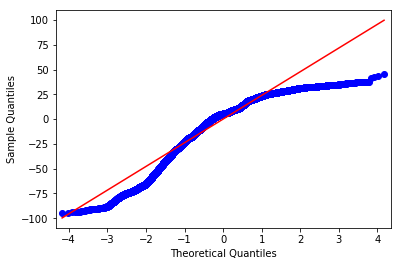

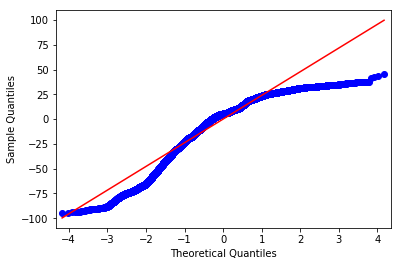

In [86]:
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()